In [62]:
import numpy as np
import pandas as pd

In [63]:
!wget https://raw.githubusercontent.com/alexeygrigorev/datasets/master/car_fuel_efficiency.csv

--2025-10-06 14:27:22--  https://raw.githubusercontent.com/alexeygrigorev/datasets/master/car_fuel_efficiency.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 874188 (854K) [text/plain]
Saving to: ‘car_fuel_efficiency.csv.3’

car_fuel_efficiency 100%[===================>] 853.70K  --.-KB/s    in 0.05s   

2025-10-06 14:27:22 (16.7 MB/s) - ‘car_fuel_efficiency.csv.3’ saved [874188/874188]



In [64]:
df = pd.read_csv('car_fuel_efficiency.csv')

In [65]:
df.head()

,engine_displacement,num_cylinders,horsepower,vehicle_weight,acceleration,model_year,origin,fuel_type,drivetrain,num_doors,fuel_efficiency_mpg
0,170,3.0,159.0,3413.433759,17.7,2003,Europe,Gasoline,All-wheel drive,0.0,13.231729
1,130,5.0,97.0,3149.664934,17.8,2007,USA,Gasoline,Front-wheel drive,0.0,13.688217
2,170,NaN,78.0,3079.038997,15.1,2018,Europe,Gasoline,Front-wheel drive,0.0,14.246341
3,220,4.0,NaN,2542.392402,20.2,2009,USA,Diesel,All-wheel drive,2.0,16.912736
4,210,1.0,140.0,3460.870990,14.4,2009,Europe,Gasoline,All-wheel drive,2.0,12.488369


In [66]:
df = df[[
    'engine_displacement',
    'horsepower',
    'vehicle_weight',
    'model_year',
    'fuel_efficiency_mpg'
]]

df

,engine_displacement,horsepower,vehicle_weight,model_year,fuel_efficiency_mpg
0,170,159.0,3413.433759,2003,13.231729
1,130,97.0,3149.664934,2007,13.688217
2,170,78.0,3079.038997,2018,14.246341
3,220,NaN,2542.392402,2009,16.912736
4,210,140.0,3460.870990,2009,12.488369
...,...,...,...,...,...
9699,140,164.0,2981.107371,2013,15.101802
9700,180,154.0,2439.525729,2004,17.962326
9701,220,138.0,2583.471318,2008,17.186587
9702,230,177.0,2905.527390,2011,15.331551


In [67]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

<Axes: xlabel='fuel_efficiency_mpg', ylabel='Count'>

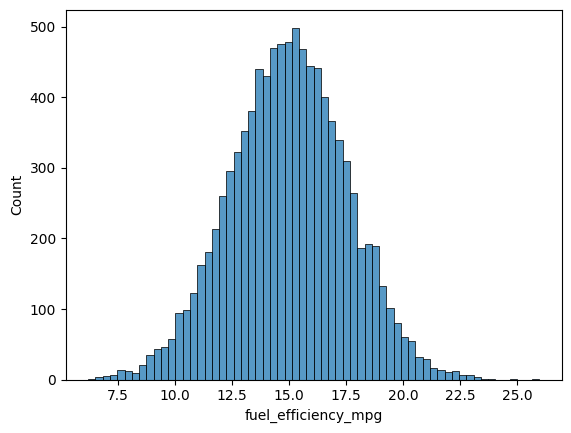

In [68]:
sns.histplot(df.fuel_efficiency_mpg)

In [69]:
df.isnull().sum()

,0
engine_displacement,0
horsepower,708
vehicle_weight,0
model_year,0
fuel_efficiency_mpg,0


In [70]:
df.horsepower.median()

149.0

In [71]:
np.random.seed(42)

n = len(df)

n_val = int(0.2 * n)
n_test = int(0.2 * n)
n_train = n - (n_val + n_test)

idx = np.arange(n)
np.random.shuffle(idx)

df_shuffled = df.iloc[idx]

df_train = df_shuffled.iloc[:n_train].copy()
df_val = df_shuffled.iloc[n_train:n_train+n_val].copy()
df_test = df_shuffled.iloc[n_train+n_val:].copy()

In [72]:
y_train_orig = df_train.fuel_efficiency_mpg.values
y_val_orig = df_val.fuel_efficiency_mpg.values
y_test_orig = df_test.fuel_efficiency_mpg.values

y_train = np.log1p(df_train.fuel_efficiency_mpg.values)
y_val = np.log1p(df_val.fuel_efficiency_mpg.values)
y_test = np.log1p(df_test.fuel_efficiency_mpg.values)

del df_train['fuel_efficiency_mpg']
del df_val['fuel_efficiency_mpg']
del df_test['fuel_efficiency_mpg']

In [73]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)

    return w[0], w[1:]

In [79]:
def prepare_X_0(df):
    df_num = df.copy()
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

In [81]:
mean_hp = df_train['horsepower'].mean()

def prepare_X_mean(df):
    df_num = df.copy()
    df_num = df_num.fillna(mean_hp)
    X = df_num.values
    return X

In [99]:
def rmse(y, y_pred):
    error = y_pred - y
    mse = (error ** 2).mean()
    return np.sqrt(mse)

In [100]:
# with 0 filled
X_train = prepare_X_0(df_train)
w_0, w = train_linear_regression(X_train, y_train)

y_pred = w_0 + X_train.dot(w)

rmse(y_train, y_pred)

np.float64(0.0390863253926525)

In [101]:
X_val = prepare_X_0(df_val)
y_pred = w_0 + X_val.dot(w)

rmse_with_zero = round(rmse(y_val, y_pred),2)
rmse_with_zero

np.float64(0.04)

In [102]:
# with mean filled
X_train = prepare_X_mean(df_train)
w_0, w = train_linear_regression(X_train, y_train)

y_pred = w_0 + X_train.dot(w)

rmse(y_train, y_pred)


np.float64(0.03581083785900231)

In [103]:
X_val = prepare_X_mean(df_val)
y_pred = w_0 + X_val.dot(w)

rmse_with_mean = round(rmse(y_val, y_pred),2)
rmse_with_mean

np.float64(0.04)

# Regularization

In [104]:
def train_linear_regression_reg(X, y, r=0.0):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    reg = r * np.eye(XTX.shape[0])
    XTX = XTX + reg

    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)

    return w[0], w[1:]

In [111]:
X_train = prepare_X_0(df_train)

In [112]:
X_train = prepare_X_0(df_train)
X_val = prepare_X_0(df_val)

for r in [0, 0.01, 0.1, 1, 5, 10, 100]:
    w_0, w = train_linear_regression_reg(X_train, y_train, r=r)
    y_pred = w_0 + X_val.dot(w)
    print('%6s' %r, round(rmse(y_val, y_pred),2))

     0 0.04
  0.01 0.04
   0.1 0.04
     1 0.04
     5 0.04
    10 0.04
   100 0.04


# Q5

In [124]:
seeds = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
rmse_scores = []

for seed in seeds:

    np.random.seed(seed)
    n = len(df)
    idx = np.arange(n)
    np.random.shuffle(idx)
    df_shuffled = df.iloc[idx]


    n_train = int(0.6 * n)
    n_val = int(0.2 * n)

    df_train = df_shuffled.iloc[:n_train].copy()
    df_val = df_shuffled.iloc[n_train:n_train+n_val].copy()


    y_train = df_train['fuel_efficiency_mpg'].values
    y_val = df_val['fuel_efficiency_mpg'].values


    df_train = df_train.drop('fuel_efficiency_mpg', axis=1)
    df_val = df_val.drop('fuel_efficiency_mpg', axis=1)


    X_train = prepare_X_0(df_train)
    X_val = prepare_X_0(df_val)


    w_0, w = train_linear_regression(X_train, y_train)


    y_pred = w_0 + X_val.dot(w)


    score = rmse(y_val, y_pred)
    rmse_scores.append(score)

    print(f"Seed {seed}: RMSE = {score:.4f}")

Seed 0: RMSE = 0.5211
Seed 1: RMSE = 0.5218
Seed 2: RMSE = 0.5230
Seed 3: RMSE = 0.5161
Seed 4: RMSE = 0.5112
Seed 5: RMSE = 0.5287
Seed 6: RMSE = 0.5322
Seed 7: RMSE = 0.5095
Seed 8: RMSE = 0.5149
Seed 9: RMSE = 0.5131


In [125]:
std = np.std(rmse_scores)
print(round(std, 3))


0.007


# Q 6

In [128]:
np.random.seed(9)

n = len(df)
idx = np.arange(n)
np.random.shuffle(idx)
df_shuffled = df.iloc[idx]

n_train = int(0.6 * n)
n_val = int(0.2 * n)

df_train = df_shuffled.iloc[:n_train].copy()
df_val = df_shuffled.iloc[n_train:n_train+n_val].copy()
df_test = df_shuffled.iloc[n_train+n_val:].copy()

df_train_full = pd.concat([df_train, df_val])

y_train_full = df_train_full['fuel_efficiency_mpg'].values
y_test = df_test['fuel_efficiency_mpg'].values

df_train_full = df_train_full.drop('fuel_efficiency_mpg', axis=1)
df_test = df_test.drop('fuel_efficiency_mpg', axis=1)

X_train_full = prepare_X_0(df_train_full)
X_test = prepare_X_0(df_test)

w_0, w = train_linear_regression_reg(X_train_full, y_train_full, r=0.001)
y_pred = w_0 + X_test.dot(w)

test_rmse = rmse(y_test, y_pred)
print(round(test_rmse,4))

0.5155
